### Gradient Boosting Classification

#### Data comes from Kaggle https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

- StudentID - A unique identifier assigned to each student (1001 to 3392).
- Age - The age of the students ranges from 15 to 18 years.
- Gender - Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity - The ethnicity of the students: 0: Caucasian, 1: African American, 2: Asian, 3: Other
- ParentalEducation - 0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher, 
- StudyTimeWeekly - Weekly study time in hours, ranging from 0 to 20.
- Absences - Number of absences during the school year, ranging from 0 to 30.
- Tutoring - Tutoring status, where 0 indicates No and 1 indicates Yes.
- ParentalSupport - 0: None, 1: Low, 2: Moderate, 3: High, 4: Very High
- Extracurricular - Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports - Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music - Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering - Participation in volunteering, where 0 indicates No and 1 indicates Yes.
- GPA - Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
- Target Variable Grade Class - 0: 'A' (GPA >= 3.5), 1: 'B' (3.0 <= GPA < 3.5), 2: 'C' (2.5 <= GPA < 3.0), 3: 'D' (2.0 <= GPA < 2.5), 4: 'F' (GPA < 2.0)

Note I've turn some columns into categorical, and only kept few of them for cleanliness while learning. Also while practicing it was the GPA by far the only important feature for predictions anyways.

#### Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#### Import dataset

In [3]:
dataset = pd.read_csv('Student_performance_data _2.csv')
dataset = dataset.drop(columns=['StudentID', 'Age' , 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering'])
dataset.rename(columns = { 'GradeClass': 'Grade'}, inplace=True)
dataset

,Gender,Ethnicity,StudyTimeWeekly,Absences,GPA,Grade
0,Female,Caucasian,19.833723,7,2.929196,Pass
1,Male,Caucasian,15.408756,0,3.042915,Pass
2,Male,Asian,4.210570,26,0.112602,Fail
3,Female,Caucasian,10.028829,14,2.054218,Fail
4,Female,Caucasian,4.672495,17,1.288061,Fail
...,...,...,...,...,...,...
2387,Female,Caucasian,10.680555,2,3.455509,Pass
2388,Male,Caucasian,7.583217,4,3.279150,Fail
2389,Female,Caucasian,6.805500,20,1.142333,Pass
2390,Female,AfricanAmerican,12.416653,17,1.803297,Pass


In [4]:
dataset['Grade'].value_counts() 
#there is little bit of imbalanced dataset

Fail    1625
Pass     767
Name: Grade, dtype: int64

In [5]:
dataset.isnull().sum()

Gender             0
Ethnicity          0
StudyTimeWeekly    0
Absences           0
GPA                0
Grade              0
dtype: int64

In [6]:
# sns.scatterplot(data = dataset, x='StudyTimeWeekly', y='GPA', hue='Grade', alpha=0.7) 

#### Create Dummy Variables
Note: if we leave Ethnicity as is the model might interpret that there is level of importance For example, 3: Other is greater than 2: Asian which is greater than 1: African American, etc. We want to avoid the relationship/level of importance and turn them into binary/dummy.

Gender is good, Ethnicity needs converted, StudyTime is good, Absences is good (as more the more important it is), GPA is good, and Grade needs converted (A, B or C needs to be Pass and D & F needs to be fail

In [7]:
df = pd.get_dummies(dataset, drop_first=True) #To avoid multicollinearity (especially useful for regression models)
df = pd.concat([df], axis=1)
df

,StudyTimeWeekly,Absences,GPA,Gender_Male,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,Grade_Pass
0,19.833723,7,2.929196,0,0,1,0,1
1,15.408756,0,3.042915,1,0,1,0,1
2,4.210570,26,0.112602,1,1,0,0,0
3,10.028829,14,2.054218,0,0,1,0,0
4,4.672495,17,1.288061,0,0,1,0,0
...,...,...,...,...,...,...,...,...
2387,10.680555,2,3.455509,0,0,1,0,1
2388,7.583217,4,3.279150,1,0,1,0,0
2389,6.805500,20,1.142333,0,0,1,0,1
2390,12.416653,17,1.803297,0,0,0,0,1


#### Separate X features & y labels

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### SPLIT into Training & Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### TRAIN the model

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier() 
model.fit(X_train, y_train)

GradientBoostingClassifier()

#### TEST the model

In [11]:
y_pred = model.predict(X_test)
new_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
new_df.sample(5)

,y_test,y_pred
194,0,0
477,0,0
170,1,1
50,1,1
162,0,0


#### EVAULATE the model

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# model.coef_ -----#not available for Decision Tree

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

#OK a very good model

Accuracy Score: 0.9457202505219207
Precision Score: 0.9476436043845754
Recall Score: 0.9457202505219207
F1 Score: 0.9447212028652671


In [13]:
import warnings
warnings.filterwarnings('ignore')

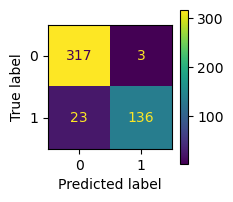

In [14]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test).figure_.set_size_inches(2, 2)

In [15]:
confusion_matrix(y_test, y_pred)

array([[317,   3],
       [ 23, 136]], dtype=int64)

#### What are the most important X features?

In [16]:
X = df.drop('Grade_Pass', axis=1)

pd.DataFrame(index=X.columns, data=model.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance')
#GPA is by far the most important feature

,Feature Importance
Ethnicity_Caucasian,0.000083
Ethnicity_Other,0.000358
Gender_Male,0.001244
Ethnicity_Asian,0.002288
Absences,0.004319
StudyTimeWeekly,0.032290
GPA,0.959417


In [17]:
probability_data = model.predict_proba(X_test)
new_df['PercentChance0Class'] = probability_data[:, 0]
new_df['PercentChance1Class'] = probability_data[:, 1]

new_df

,y_test,y_pred,PercentChance0Class,PercentChance1Class
0,0,0,0.949077,0.050923
1,1,1,0.027966,0.972034
2,0,0,0.984413,0.015587
3,0,0,0.958397,0.041603
4,1,1,0.015358,0.984642
...,...,...,...,...
474,0,0,0.969265,0.030735
475,0,0,0.974553,0.025447
476,0,0,0.966087,0.033913
477,0,0,0.959376,0.040624


#### Visualize the model

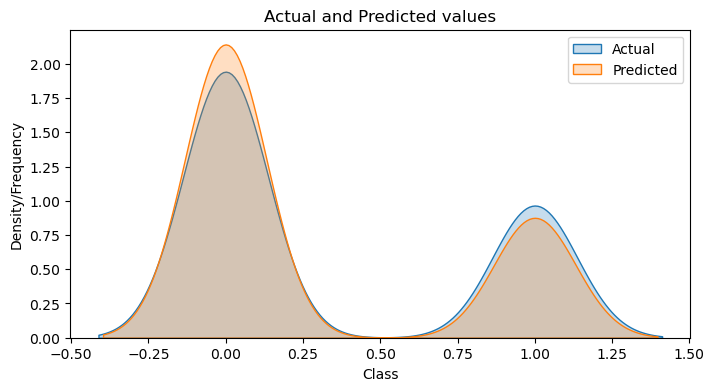

In [18]:
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)

plt.title('Actual and Predicted values')
plt.xlabel('Class')
plt.ylabel('Density/Frequency')
#plt.xticks(unique_classes)  # Set x-axis to only show the classes 0 and 1
plt.legend()
plt.show()

# y_test & y_pred mostly overlap, but definitely noticeable difference, thus why 61% accuracy

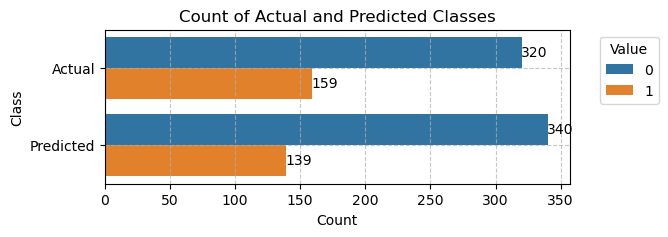

In [19]:
# Combine y_test and y_pred into a single DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the counts of each class
plt.figure(figsize=(6, 2))
plot = sns.countplot(y='variable', hue='value', data=pd.melt(comparison_df))

# Add counts on top of the bars
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (9, 0), 
                  textcoords = 'offset points')

plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Count of Actual and Predicted Classes')
plt.ylabel('Class')
plt.xlabel('Count')
plt.show()

#### Predict new student

In [20]:
print(model.predict([[14, 2, 3.4, 0, 0, 1, 0]]))
# if a student spends 14 hours Studying Weekly, it is Absence 2x, has GPA of 3.4, is female, caucasian then the student will Pass
print(model.predict_proba([[14, 2, 3.4, 0, 0, 1, 0]]))
# 1% that it will be class 0, and 98.8% that it will be class 1

[1]
[[0.01199239 0.98800761]]


In [21]:
print(model.predict([[14, 2, 1.0, 0, 0, 1, 0]]))
# if a student spends 14 hours Studying Weekly, it is Absence 2x, has GPA of 1.0, is female, caucasian then the student will Fail
print(model.predict_proba([[14, 2, 1.0, 0, 0, 1, 0]]))
# 92% class 0, and 7% that it will be class 1

[0]
[[0.92845488 0.07154512]]


- Age - The age of the students ranges from 15 to 18 years.
- Gender - Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity - The ethnicity of the students: 0: Caucasian, 1: African American, 2: Asian, 3: Other
- ParentalEducation - 0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher, 
- StudyTimeWeekly - Weekly study time in hours, ranging from 0 to 20.
- Absences - Number of absences during the school year, ranging from 0 to 30.
- Tutoring - Tutoring status, where 0 indicates No and 1 indicates Yes.
- ParentalSupport - 0: None, 1: Low, 2: Moderate, 3: High, 4: Very High
- Extracurricular - Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports - Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music - Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering - Participation in volunteering, where 0 indicates No and 1 indicates Yes.
- GPA - Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
- Target Variable Grade Class - 0: 'A' (GPA >= 3.5), 1: 'B' (3.0 <= GPA < 3.5), 2: 'C' (2.5 <= GPA < 3.0), 3: 'D' (2.0 <= GPA < 2.5), 4: 'F' (GPA < 2.0)

#### Elbow method

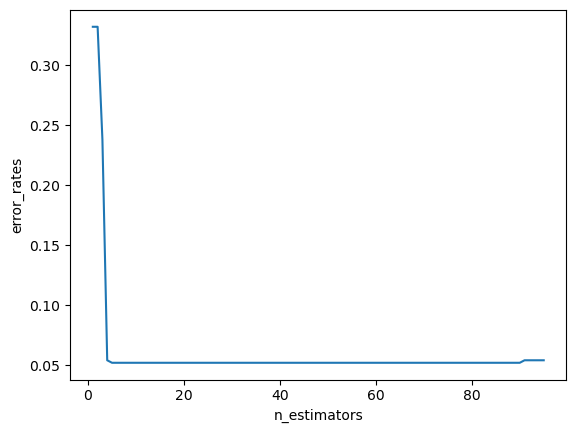

In [22]:
error_rates = []

for n in range(1,96):
    model = GradientBoostingClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test, preds)
    
    error_rates.append(err)
    
    
    
plt.plot(range(1,96), error_rates)
plt.xlabel('n_estimators')
plt.ylabel('error_rates')
plt.show()

In [ ]:
# Need to learn more about AdaBoost

In [23]:
# Grid Search with Cross Validation

from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[50, 100], 
             'learning_rate': [0.1, 0.05, 0.2],
             'max_depth': [3, 4, 5]
}
model = GradientBoostingClassifier()
grid = GridSearchCV(model, param_grid)
grid.fit(X_train, y_train)

pred = grid.predict(X_test)

grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}